<a href="https://colab.research.google.com/github/gokulj45/Linear-Regression/blob/main/Linear_Regression_for_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression on - Computer Hardware Performance dataset**

Note: Prepared with Google Colab, best rendered when opened with Colab

##Importing Libraries and Datasets

In [1]:
#Importing necessary libraries
import copy, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from math import sqrt
from IPython.display import display

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

> ## The data set is taken from - [Data set](https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/)

## Data Visualization and Exploration

In [2]:
#Creating a list with attribute names
feature_list: list = ['Vendor_name','Model_name','Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels', 'Published_performance', 'Estimated_performance' ];
#Reading the dataset and storing it to a pandas dataframe
data_df: object = pd.read_csv('https://raw.githubusercontent.com/gokulj45/Linear-Regression/main/machine.data', names=feature_list)
#data_df: object = pd.read_csv('machine.data', names=feature_list)
#Printing first two records for sanity check
display(data_df.head(5))


,Vendor_name,Model_name,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels,Published_performance,Estimated_performance
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


###Statistical Measures

In [3]:
#Number of Instances = 209
#Number of Attributes = 10
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Vendor_name            209 non-null    object
 1   Model_name             209 non-null    object
 2   Machine_cycle_time     209 non-null    int64 
 3   Min_main_mem           209 non-null    int64 
 4   Max_main_mem           209 non-null    int64 
 5   Cache_mem              209 non-null    int64 
 6   Min_channels           209 non-null    int64 
 7   Max_channels           209 non-null    int64 
 8   Published_performance  209 non-null    int64 
 9   Estimated_performance  209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


None

In [4]:
#Descriptive statistical measures of the data
display(data_df.describe())

,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels,Published_performance,Estimated_performance
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


### Null Value and Missing value Analysis

In [5]:
# Checking for null values in all attributes
display(data_df.isnull().sum())

Vendor_name              0
Model_name               0
Machine_cycle_time       0
Min_main_mem             0
Max_main_mem             0
Cache_mem                0
Min_channels             0
Max_channels             0
Published_performance    0
Estimated_performance    0
dtype: int64

In [6]:
# Checking for Duplicate values in all attributes
print("No of Duplicate values : ",data_df.duplicated().sum())

No of Duplicate values :  0


There are no Null values and Missing values present and hence no explicit handling is required for the same.

### Correlation Analaysis

In [7]:
#Using only 6 predictive attributes and goal attribute for correlation analysis
# Dropping vendor name, model name and estimated performance attribute
input_df = data_df.drop(columns=['Vendor_name', 'Model_name', 'Estimated_performance'])
print("The predictive attributes are :")
for i in input_df.columns:
  print(i)
correlation_matrix: object = input_df.corr()
display(correlation_matrix)

The predictive attributes are :
Machine_cycle_time
Min_main_mem
Max_main_mem
Cache_mem
Min_channels
Max_channels
Published_performance


,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels,Published_performance
Machine_cycle_time,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
Min_main_mem,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
Max_main_mem,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
Cache_mem,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
Min_channels,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
Max_channels,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
Published_performance,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


From the last row of the above table we can get the correlation of all the features with target variable.



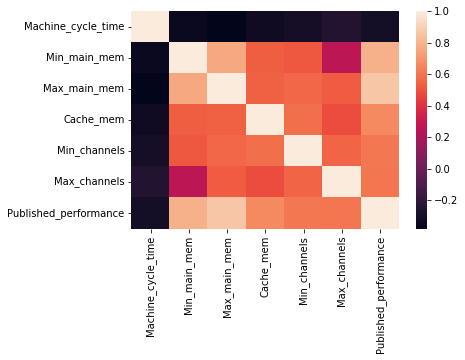

In [8]:
# visualize using heat map
sns.heatmap(correlation_matrix)

*   Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of those.
*  Since we don't have any two predictors with correlation >= 0.8, we have kept all 6 of them.

### Boxplot analysis of Predictor variables.

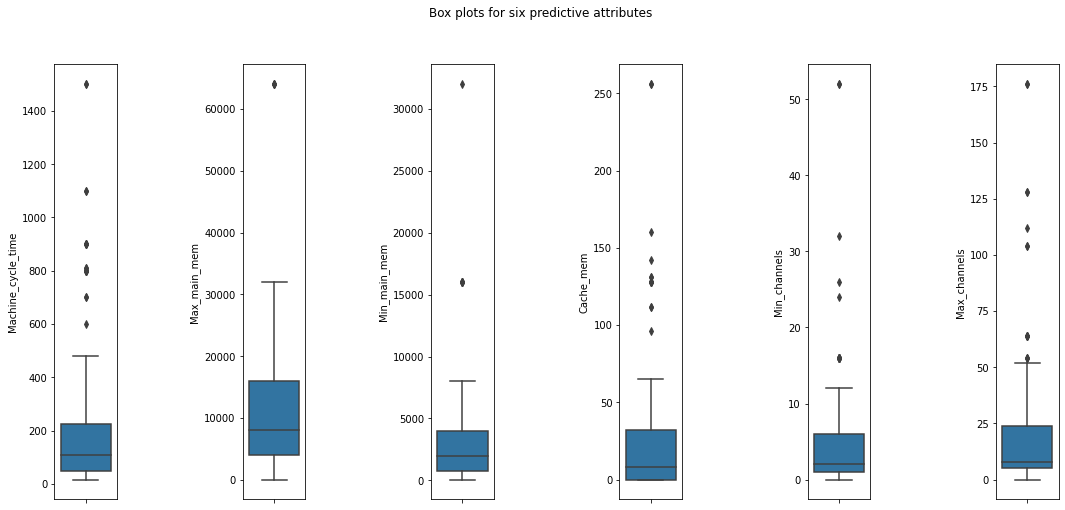

In [9]:
# box plots for six predictive attributes
fig, axes = plt.subplots(1, 6, figsize=(18, 8))
fig.suptitle('Box plots for six predictive attributes')
fig.subplots_adjust(hspace=5, wspace=2)  
sns.boxplot(ax=axes[0], data=input_df, y='Machine_cycle_time')
sns.boxplot(ax=axes[1], data=input_df, y='Max_main_mem')
sns.boxplot(ax=axes[2], data=input_df, y='Min_main_mem')
sns.boxplot(ax=axes[3], data=input_df, y='Cache_mem')
sns.boxplot(ax=axes[4], data=input_df, y='Min_channels')
sns.boxplot(ax=axes[5], data=input_df, y='Max_channels')

### Input Dataframe creation

In [10]:
#Creating 2 dataframes - x_df with 6 predictive attributes, y_df with goal attribute
x_df = input_df[['Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels']]
y_df = input_df['Published_performance']

### Train - Test Split

In [11]:
# Splitting the training and testing data from cleaned data
x_train_set, x_test_set,y_train_set,y_test_set = train_test_split(x_df,y_df, train_size=0.9)

# Show the Training and Testing Data
print('Shape of training feature:', x_train_set.shape)
print('Shape of testing feature:', x_test_set.shape)
print('Shape of training label:', y_train_set.shape)
print('Shape of training label:', y_test_set.shape)

Shape of training feature: (188, 6)
Shape of testing feature: (21, 6)
Shape of training label: (188,)
Shape of training label: (21,)


###Plotting each feature vs. the target

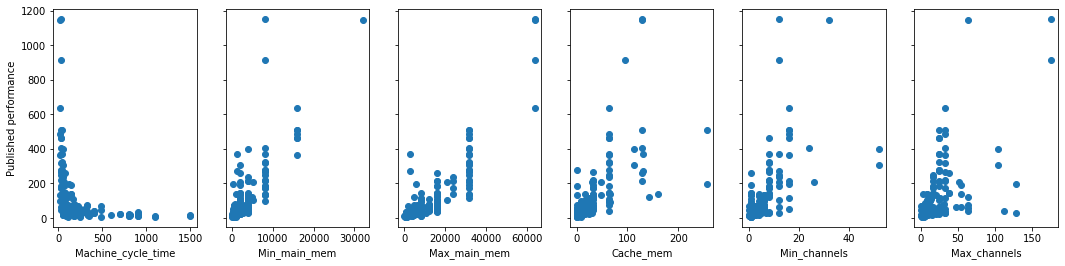

In [12]:
X_features = ['Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels']
x_numpy_arr = x_df.to_numpy()
y_numpy_arr = y_df.to_numpy()
fig,ax=plt.subplots(1, 6, figsize=(18, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_numpy_arr[:,i],y_numpy_arr)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Published performance")
plt.show()


###Feature Scaling

In [13]:
display(x_train_set.head())

,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels
163,56,4000,12000,0,1,8
36,50,500,2000,8,1,4
80,330,1000,3000,0,2,4
33,50,2620,10480,30,12,24
17,143,512,5000,0,7,32


In [14]:
# Function to compute z scrore normalized values for input data
def zscore_normalize_features(X):
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#x_sklearn_scale = scale(x_train_set, axis=0, with_mean=True, with_std=True, copy=True)

In [15]:
# Normalizing the training data and storing mu and sigma for later use on testing data
X_train, mu_norm, sigma_norm = zscore_normalize_features(x_train_set)
scaler = RobustScaler()
X_train_1 = scaler.fit_transform(x_train_set)
X_test_1 = scaler.transform(x_test_set)
display(X_train_1)

array([[-0.28421053,  0.61881188,  0.33333333, -0.25      , -0.4       ,
         0.        ],
       [-0.31578947, -0.46410891, -0.5       ,  0.        , -0.4       ,
        -0.21052632],
       [ 1.15789474, -0.30940594, -0.41666667, -0.25      , -0.2       ,
        -0.21052632],
       ...,
       [ 1.        , -0.38118812, -0.29166667, -0.25      , -0.4       ,
         0.84210526],
       [ 5.21052632, -0.38118812, -0.5       , -0.25      , -0.4       ,
        -0.36842105],
       [ 1.10526316, -0.46039604,  0.        , -0.125     , -0.4       ,
        -0.15789474]])

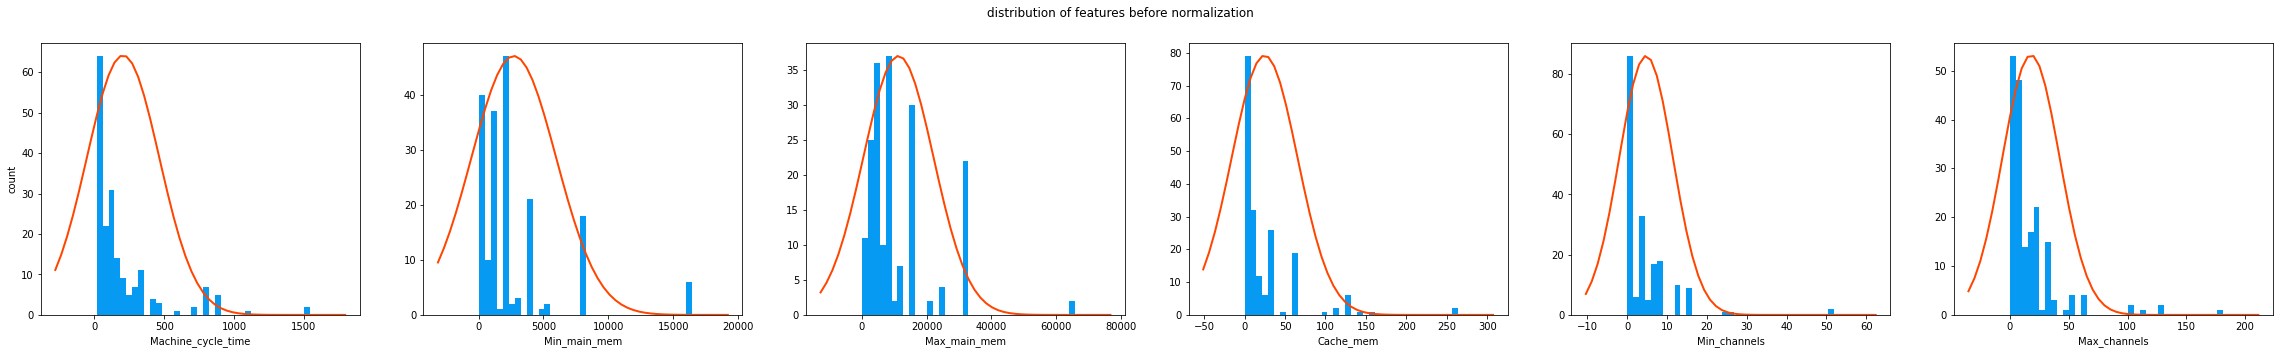

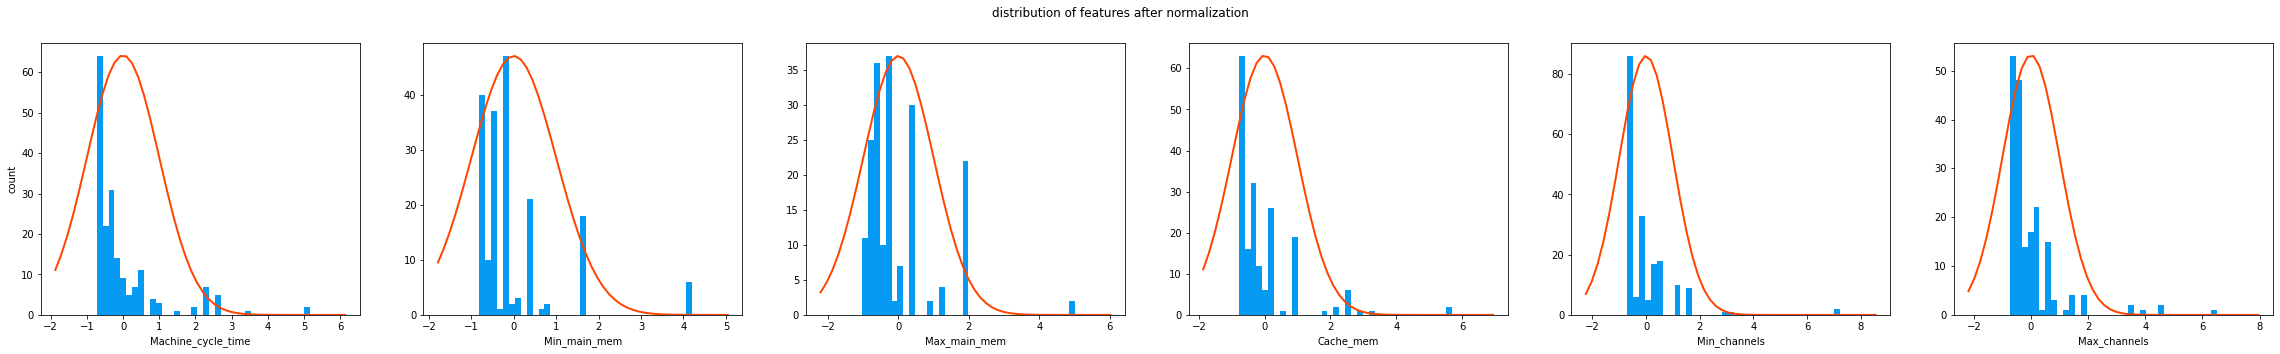

In [16]:
#Functions to draw histogram of original and normalized data
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data)) * 0.2
    x = np.linspace(np.min(data) - scale, np.max(data) + scale, 50)
    _, bins, _ = ax.hist(data, x, color='xkcd:azure')
    mu = np.mean(data)
    std = np.std(data)
    dist = stats.norm.pdf(bins, loc=mu, scale=std)
    axr = ax.twinx()
    axr.plot(bins, dist, color='orangered', lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

def show_histogram(X_f,X_p,X_p_n):
  fig,ax=plt.subplots(1, 6, figsize=(40, 5))
  for i in range(len(ax)):
      norm_plot(ax[i],X_p[:,i],)
      ax[i].set_xlabel(X_f[i])
  ax[0].set_ylabel("count");
  fig.suptitle("distribution of features before normalization")
  fig.savefig('before_normalization.jpg')
  plt.show()
  fig,ax=plt.subplots(1, 6,figsize=(40,5))
  for i in range(len(ax)):
      norm_plot(ax[i],X_p_n[:,i],)
      ax[i].set_xlabel(X_f[i])
  ax[0].set_ylabel("count"); 
  fig.suptitle("distribution of features after normalization")
  fig.savefig('after_normalization.jpg')
  plt.show()

#Data Distribution - Histogram Analysis
X_features = ['Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels']
show_histogram(X_features[:],x_train_set.to_numpy(),X_train.to_numpy())

### Observations of Exploratory data analysis (EDA)

Though our EDA might indicate possible presence of outliers, there are two reasons why we have concluded that there are no univariate outliers. 

*  Firstly even though the plots suggest possible outliers, analysis of the data clearly indicates that when one factor such as mmin is increased it would lead to increase in performance but variation in other factor such as increase in machine cyle time reduces the performance, in a way balancing the earlier and the effects make logical sense. Furthermore manufacturers would not spend time and money to create a CPU with specification that are irrelevant, illogical or widely abnormal.

*  Secondly the data set has deliberately selected 209 entries that represent a wide range of specification and if we deleted records solely based on our EDA, we would be limiting the prediction performance of our regression model.


Hence we are not removing these outliers.

## Modelling

### **Linear Regresssion**

#### Now we will fit the linear regression parameters $(w,b)$ to our dataset.
The model function for linear regression, which is a function that maps from `x` (input features) to `y` (Estimated CPU performance) is represented as 
#### $$ \hat y = w_0 x_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + w_5 x_5 + b + \epsilon \\ $$

##### $$ Estimated\_Performance = w_0(Max\_main\_mem) + w_1(Min\_main\_mem) + w_2(Cache\_mem) + w_3(Max\_channels) + w_4(Min\_channels) + w_5(Machine\_cycle\_time) + b + \epsilon \\ $$

This equation gives us a line that fits the data and performs better that average line.

where,
$$ b \\ $$ is intercept, 
$$ w_0, .. w_5 \\ $$ are all coefficients,
$$ \epsilon \\ $$ is error or residual. 

To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset. To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$. The cost function J, calculates the error between the expected value of `y` and the value of `ŷ` calculated or predicted by our model $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$. The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.
To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 

With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$. The trained linear regression model can then take the input features `x` (machine cycle time, minimum main memory, maximum main memory, cache memory, minimum channels, maximum channels) and output a prediction `ŷ` (estimated CPU performance).

### **Compute Cost**

#### Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- we can think of $f_{w,b}(x^{(i)})$ as the model's prediction of as the model's prediction of our CPU's performance, as opposed to $y^{(i)}$, which is the actual performance that is recorded in the data.
- $m$ is the number of training examples in the dataset

In [17]:
# Function to compute the cost function for linear regression
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [18]:
# Compute cost with some initial values for paramaters w, b
initial_w = np.array([ -0.39133535, 0.75376741, 0.36032453, 0.42131618, 0.12884866, 0.56482614])
initial_b = 1

cost = compute_cost(X_train_1, y_train_set.to_numpy(), initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 12330.098


In [19]:
#Computes the gradient for linear regression 
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [20]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train_1, y_train_set.to_numpy(), initial_w, initial_b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -95.76946426833508
dj_dw at initial w,b: 
 [   9.79433506 -119.48134522 -121.44720996 -156.46508232 -133.46289343
 -132.91566863]


In [21]:
#Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [22]:
# initialize parameters
initial_w = np.zeros_like(initial_w)
initial_b = 0.0
print(initial_w, initial_b)
# some gradient descent settings
iterations = 30000
alpha = 3.0e-3
# run gradient descent 
y_train = y_train_set.to_numpy()
x_train = X_train_1
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
fin_y = []
for i in range(m):
    y_cap = np.dot(x_train[i], w_final) + b_final
    print(f"prediction: {y_cap:0.2f}, target value: {y_train[i]}")
    fin_y.append(y_cap)

[0. 0. 0. 0. 0. 0.] 0.0
Iteration    0: Cost 12421.76   
Iteration 3000: Cost  1206.44   
Iteration 6000: Cost  1205.30   
Iteration 9000: Cost  1205.26   
Iteration 12000: Cost  1205.25   
Iteration 15000: Cost  1205.25   
Iteration 18000: Cost  1205.25   
Iteration 21000: Cost  1205.25   
Iteration 24000: Cost  1205.25   
Iteration 27000: Cost  1205.25   
b,w found by gradient descent: 48.29,[ 5.36479035 38.97533823 60.08889691 23.01269447  4.15800122 14.73706624] 
prediction: 83.50, target value: 42
prediction: -6.30, target value: 20
prediction: 7.72, target value: 16
prediction: 102.21, target value: 63
prediction: 32.45, target value: 28
prediction: 186.73, target value: 208
prediction: 4.38, target value: 16
prediction: 8.23, target value: 30
prediction: 55.70, target value: 60
prediction: 5.53, target value: 18
prediction: 380.90, target value: 397
prediction: -2.60, target value: 32
prediction: 295.69, target value: 277
prediction: 132.03, target value: 130
prediction: 9.91, t

In [23]:
model_set_1 = linear_model.LinearRegression()
model_set_1.fit(X_train_1, y_train_set)
predictions_set = model_set_1.predict(X_train_1)
for i in range(len(fin_y)):
    print(f"prediction: {fin_y[i]:0.2f}, target value: {y_train[i]}, sklearn_value: {predictions_set[i]}")
#print(len())
#print(predictions_set)

prediction: 83.50, target value: 42, sklearn_value: 83.49982532495312
prediction: -6.30, target value: 20, sklearn_value: -6.300240531693191
prediction: 7.72, target value: 16, sklearn_value: 7.721201541900811
prediction: 102.21, target value: 63, sklearn_value: 102.20961788084976
prediction: 32.45, target value: 28, sklearn_value: 32.44682734726549
prediction: 186.73, target value: 208, sklearn_value: 186.72773620539778
prediction: 4.38, target value: 16, sklearn_value: 4.381202825617066
prediction: 8.23, target value: 30, sklearn_value: 8.226363406644609
prediction: 55.70, target value: 60, sklearn_value: 55.69948924912367
prediction: 5.53, target value: 18, sklearn_value: 5.525702841359717
prediction: 380.90, target value: 397, sklearn_value: 380.89558240947383
prediction: -2.60, target value: 32, sklearn_value: -2.5987383914741002
prediction: 295.69, target value: 277, sklearn_value: 295.6897720258717
prediction: 132.03, target value: 130, sklearn_value: 132.0265504766405
predictio

In [24]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [25]:
columns = ['Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels', 'Published_performance']
input_clean = remove_outliers(input_df,columns,3)


Working on column: Machine_cycle_time
Working on column: Min_main_mem
Working on column: Max_main_mem
Working on column: Cache_mem
Working on column: Min_channels
Working on column: Max_channels
Working on column: Published_performance


In [26]:
#Creating 2 dataframes - x_df with 6 predictive attributes, y_df with goal attribute
x_clean = input_clean[['Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels']]
y_clean = input_clean['Published_performance']
# Splitting the training and testing data from cleaned data
x_train_set_2, x_test_set_2,y_train_set_2,y_test_set_2 = train_test_split(x_clean,y_clean, train_size=0.9)

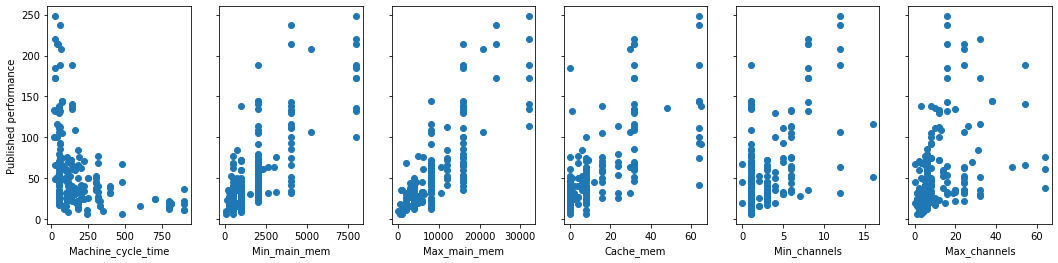

In [27]:
X_features = ['Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels']
x_numpy_arr = x_clean.to_numpy()
y_numpy_arr = y_clean.to_numpy()
fig,ax=plt.subplots(1, 6, figsize=(18, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_numpy_arr[:,i],y_numpy_arr)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Published performance")
plt.show()

In [31]:
# initialize parameters
initial_w = np.zeros_like(initial_w)
initial_b = 0.0
print(initial_w, initial_b)
# some gradient descent settings
iterations = 95000
alpha = 1.0e-8
# run gradient descent 
y_train = y_train_set_2.to_numpy()
x_train = x_train_set_2.to_numpy()
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
fin_y = []
for i in range(m):
    y_cap = np.dot(x_train[i], w_final) + b_final
    #print(f"prediction: {y_cap:0.2f}, target value: {y_train[i]}")
    fin_y.append(y_cap)

[0. 0. 0. 0. 0. 0.] 0.0
Iteration    0: Cost   963.52   
Iteration 9500: Cost   320.50   
Iteration 19000: Cost   318.08   
Iteration 28500: Cost   315.76   
Iteration 38000: Cost   313.52   
Iteration 47500: Cost   311.37   
Iteration 57000: Cost   309.30   
Iteration 66500: Cost   307.32   
Iteration 76000: Cost   305.41   
Iteration 85500: Cost   303.57   
b,w found by gradient descent: 0.00,[0.00272898 0.01132771 0.00369099 0.12115177 0.01477845 0.07211883] 


In [39]:
model_set_1 = linear_model.LinearRegression()
model_set_1.fit(x_train_set_2, y_train_set_2)
predictions_set = model_set_1.predict(x_train_set_2)
for i in range(len(fin_y)):
    print(f"prediction: {fin_y[i]:0.2f}, target value: {y_train[i]}, sklearn_value: {predictions_set[i]}")

prediction: 22.59, target value: 50, sklearn_value: 26.532326924018257
prediction: 42.84, target value: 67, sklearn_value: 50.838267726424924
prediction: 57.57, target value: 60, sklearn_value: 62.49340475290205
prediction: 45.16, target value: 71, sklearn_value: 45.84236274980262
prediction: 114.53, target value: 93, sklearn_value: 130.8182525436251
prediction: 37.90, target value: 40, sklearn_value: 31.24162381312538
prediction: 15.14, target value: 69, sklearn_value: 15.837352796863094
prediction: 91.55, target value: 75, sklearn_value: 86.24135243049813
prediction: 88.72, target value: 54, sklearn_value: 96.06170132392629
prediction: 23.85, target value: 16, sklearn_value: 22.531624507153303
prediction: 54.27, target value: 71, sklearn_value: 47.85201387280317
prediction: 60.59, target value: 60, sklearn_value: 58.657280990444804
prediction: 27.12, target value: 77, sklearn_value: 26.198772321379877
prediction: 8.44, target value: 36, sklearn_value: 24.1111056379296
prediction: 4.7

## 3. Model Building

### Mathematical Equation

#### The mathematical equation for our Multiple Linear Regression model will look like,

## $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \epsilon \\ $$

## $$ Estimated\_Performance = \beta_0 + \beta_1 (Max\_main\_mem) + \beta_2 (Min\_main\_mem) + \beta_3 (Cache\_mem) + \beta_4 (Max\_channels) + \beta_5 (Min\_channels) + \beta_6 (Machine\_cycle\_time) + \epsilon \\ $$

This equation gives us a line that fits the data and performs better that average line.

where,
$$ \beta_0 \\ $$ is intercept, 
$$ \beta_1, .. \beta_6 \\ $$ are all coefficients,
$$ \epsilon \\ $$ is error or residual. 

### case 1 : Train = 80% Test = 20%

In [240]:
# Splitting the training and testing data from cleaned data
x_train_set_1, x_test_set_1,y_train_set_1,y_test_set_1 = train_test_split(x_df,y_df, train_size=0.9)
print("Set 1 : ",x_train_set_1.shape, x_test_set_1.shape, y_train_set_1.shape, y_test_set_1.shape)

Set 1 :  (188, 6) (21, 6) (188,) (21,)


#### **Model for 80-20 Train - Test split with uncleaned, skewed data**

In [ ]:
model_set_3 = linear_model.LinearRegression()
model_set_3.fit(x_train_set_3, y_train_set_3)
predictions_set_3 = model_set_3.predict(x_test_set_3)

#Calculating Mean Squared Error for Performance Evaluation
mean_square_error = mean_squared_error(y_test_set_3, predictions_set_3)
#Calculating Mean Absolute Error for Performance Evaluation
mean_abs_error = mean_absolute_error(y_test_set_3, predictions_set_3)
#Calculating Root Mean Squared Error for Performance Evaluation
root_mean_square_error = sqrt(mean_squared_error(y_test_set_3, predictions_set_3)) 


print(f'Mean Squared Error: {mean_square_error}')
print(f'Mean Absolute Error : {mean_abs_error}')
print(f'Root Mean Squared Error {root_mean_square_error}')

Mean Squared Error: 3378.00354628173
Mean Absolute Error : 42.49273972577873
Root Mean Squared Error 58.12059485485098


#### **Model for 80-20 Train - Test split with cleaned data**

In [241]:
model_set_1 = linear_model.LinearRegression()
model_set_1.fit(x_train_set_1, y_train_set_1)
predictions_set_1 = model_set_1.predict(x_test_set_1)

#Calculating Mean Squared Error for Performance Evaluation
mean_square_error_1 = mean_squared_error(y_test_set_1, predictions_set_1)
#Calculating Mean Absolute Error for Performance Evaluation
mean_abs_error_1 = mean_absolute_error(y_test_set_1, predictions_set_1)
#Calculating Root Mean Squared Error for Performance Evaluation
root_mean_square_error_1 = sqrt(mean_squared_error(y_test_set_1, predictions_set_1)) 


print(f'Mean Squared Error: {mean_square_error_1}')
print(f'Mean Absolute Error : {mean_abs_error_1}')
print(f'Root Mean Squared Error {root_mean_square_error_1}')

Mean Squared Error: 3462.291281818224
Mean Absolute Error : 36.324662997927675
Root Mean Squared Error 58.84123793580675


We can observe that with the normalized data there is a reduction in MSE.

Text(0.5, 0.98, 'Final Model - PRP Vs ERP with cleaned')

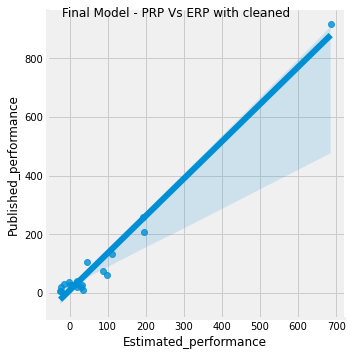

In [242]:
# Plotting the predictions of model trained with cleaned data
df_linear_set_1 = pd.DataFrame({'Published_performance':list(y_test_set_1),'Estimated_performance':predictions_set_1})
sns.lmplot(x='Estimated_performance', y='Published_performance', data=df_linear_set_1).fig.suptitle("Final Model - PRP Vs ERP with cleaned")

Text(0.5, 0.98, 'Inital Model - PRP Vs ERP with Uncleaned')

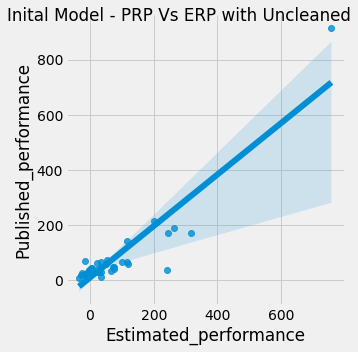

In [ ]:
# Plotting the predictions of model trained with uncleaned, skewed data
df_linear_set_3 = pd.DataFrame({'Published_performance':list(y_test_set_3),'Estimated_performance':predictions_set_3})
sns.lmplot(x='Estimated_performance', y='Published_performance', data=df_linear_set_3).fig.suptitle("Inital Model - PRP Vs ERP with Uncleaned")

From the above two plots we can say that balancing the skewness has resulted in overall better fit, It can be observed that the error values have reduced, which indicates that Final model is a better fit

### case 2 : Train = 10% Test = 90%

In [ ]:
# Plotting the predictions of model trained with 10 % data.
x_train_set_2, x_test_set_2, y_train_set_2, y_test_set_2 = train_test_split(x_df,y_df, train_size=0.1)
print("Set 2 : ",x_train_set_2.shape, x_train_set_1.shape, y_train_set_2.shape, y_train_set_1.shape)

Set 2 :  (20, 6) (167, 6) (20,) (167,)


#### **Model for 10-90 Train test split with uncleaned, skewed data**

In [ ]:
model_set_2 = linear_model.LinearRegression()
model_set_2.fit(x_train_set_2,y_train_set_2)
predictions_set_2 = model_set_2.predict(x_test_set_2)

#Calculating Mean Squared Error for Performance Evaluation
mean_square_error_2 = mean_squared_error(y_test_set_2, predictions_set_2)
#Calculating Mean Absolute Error for Performance Evaluation
mean_abs_error_2 = mean_absolute_error(y_test_set_2, predictions_set_2)
#Calculating Root Mean Squared Error for Performance Evaluation
root_mean_square_error_2 = sqrt(mean_squared_error(y_test_set_2, predictions_set_2)) 

print(f'Mean Squared Error: {mean_square_error_2}')
print(f'Mean Absolute Error : {mean_abs_error_2}')
print(f'Root Mean Squared Error {root_mean_square_error_2}')

Mean Squared Error: 0.04817330095342986
Mean Absolute Error : 0.16754245805875487
Root Mean Squared Error 0.2194841701659367


Text(0.5, 0.98, 'Model - PRP Vs ERP with 10 % Training data')

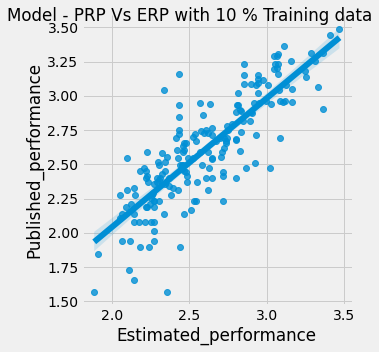

In [ ]:

df_linear_set_2 = pd.DataFrame({'Published_performance':list(y_test_set_2), 'Estimated_performance':predictions_set_2})
sns.lmplot(x='Estimated_performance', y='Published_performance', data=df_linear_set_2).fig.suptitle("Model - PRP Vs ERP with 10 % Training data")

###**Justification on Split of datasets into training and test sets.**

Case 1:

  Here we are dealing with the right model fitting, as we are taking 80-20 split for train-test data. We are able to achieve better fit that average fit.

Case 2:

 From the above cases we can see that when we take a train set of 10% it leads to high error. This is a case of underfitting, which can be seen from the plots

###  **K-Fold Cross Validation**

####80:20 - Train:Test split

In [ ]:
# KFold cross validation with neg_mean_squared_error scoring for 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
cv_scores = cross_val_score(model_set_1, x_train_set_1, y_train_set_1, scoring='neg_mean_squared_error', cv=folds)
print(f'Kfold scores \n {cv_scores}')

Kfold scores 
 [-0.02227969 -0.04698126 -0.04293735 -0.02194768 -0.024416  ]
LinearRegression()


#### 10:90 - Train:Test split

In [ ]:
# KFold cross validation with neg_mean_squared_error scoring
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
cv_scores = cross_val_score(model_set_2, x_train_set_2, y_train_set_2, scoring='neg_mean_squared_error', cv=folds)
print(f'Kfold scores \n {cv_scores}')

Kfold scores 
 [-0.02657053 -0.02066866 -0.07554855 -0.07273748 -0.00678239]


##4. Performance Evaluation

Baseline model building with average fit.

Baseline mean target value :  2.5791919579269007
----------------------------------------------------------------
Baseline Mean Squared Error: 0.1545307514897547
Baseline Mean Absolute Error : 0.3178964437852074
Baseline Root Mean Squared Error 0.3931039957692553
----------------------------------------------------------------
Mean Squared Error of the final model: 0.020903303549812506
Mean Absolute Error of the final model: 0.09951227815992308
Root Mean Squared Error of the final model: 0.14457974806248802
----------------------------------------------------------------


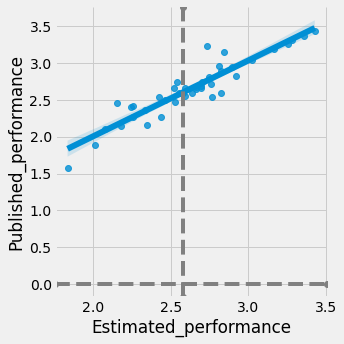

In [ ]:
# Calculating mean target value from training dataset
mean_target = y_train_set_1.mean()

print("Baseline mean target value : ", mean_target)
mean_target_list = [mean_target for i in range (0,y_test_set_2.count())]
mean_target_set = pd.Series(mean_target_list)

#Calculating Baseline Mean Squared Error for Performance Evaluation
mean_square_error_base = mean_squared_error(y_test_set_2, mean_target_set)
#Calculating Baseline Mean Absolute Error for Performance Evaluation
mean_abs_error_base = mean_absolute_error(y_test_set_2, mean_target_set)
#Calculating Baseline Root Mean Squared Error for Performance Evaluation
root_mean_square_error_base = sqrt(mean_squared_error(y_test_set_2, mean_target_set)) 

print("----------------------------------------------------------------")
print(f'Baseline Mean Squared Error : {mean_square_error_base}')
print(f'Baseline Mean Absolute Error : {mean_abs_error_base}')
print(f'Baseline Root Mean Squared Error : {root_mean_square_error_base}')
print("----------------------------------------------------------------")
print(f'Mean Squared Error of the final model : {mean_square_error_1}')
print(f'Mean Absolute Error of the final model : {mean_abs_error_1}')
print(f'Root Mean Squared Error of the final model : {root_mean_square_error_1}')
print("----------------------------------------------------------------")

# Plotting the predictions of model trained with cleaned data
df_linear_set_1 = pd.DataFrame({'Published_performance':list(y_test_set_1),'Estimated_performance':predictions_set_1})
ax = sns.lmplot(x='Estimated_performance', y='Published_performance', data=df_linear_set_1)
ax.refline(x=mean_target,y=0)

The above plot compares the fit of final model vs average fit.

####Peformance Evaluation - Conclusion


*  By comparing our RMSE values with baseline RMSE values, we can clearly observe that the final model produces considerably lower RMSE (approximately 50%), which is desired. Hence it can be concluded that our model is a better fit.
*   The influence of the six predictor variable on the dependent target variable didnot lead to overfit or underfit, as we chose 80-20 train - test split. Whereas if we choose training data of less than 50%, we were able to observe underfit.



